# Wildberry Yield - Kaggle 

## Submission by: Jatin Sahnan

#### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dftrain = pd.read_csv('train.csv')
dftrain

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [3]:
dftest = pd.read_csv('test.csv')
dftest

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847


#### Performing EDA

In [4]:
#Checking for Null Values and Data types

dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

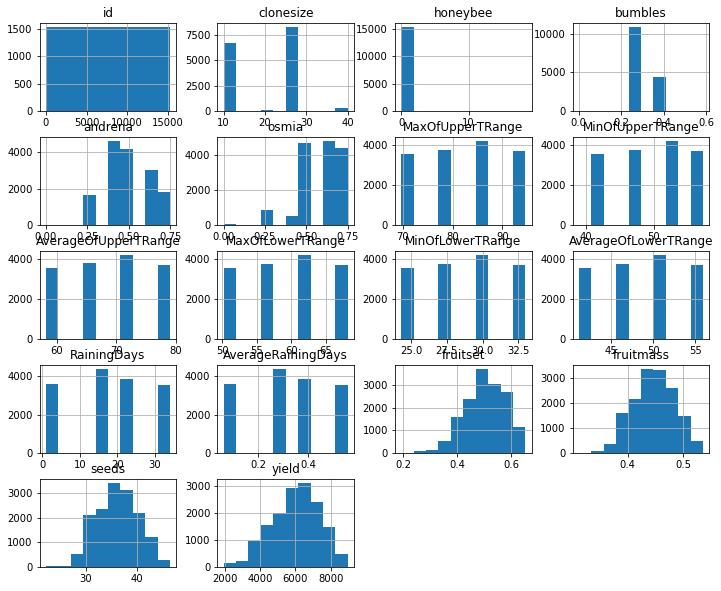

In [6]:
# Checking distribution of variables

dftrain.hist(figsize = (12,10))
plt.show()

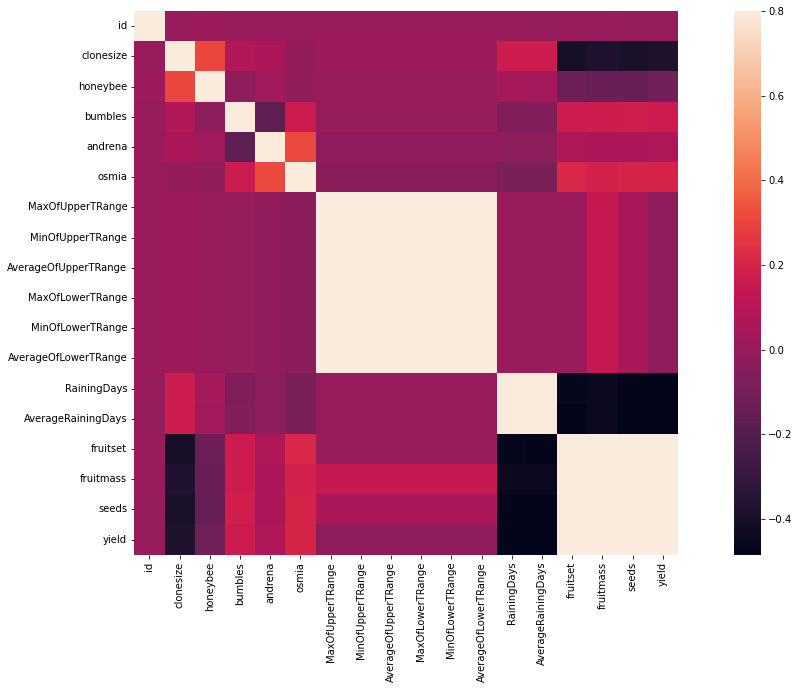

In [7]:
# Checking correlation amongst variables
import seaborn as sns

CR = dftrain.corr()
fig = plt.figure(figsize = (20,10))
sns.heatmap(CR, vmax = .8, square = True)
plt.show()

#### Splitting Datasets and running model

In [8]:
# Splitting into X & y variables in training dataset
# Dropping 'id' column from dataset

X_train, X_test, y_train, y_test = train_test_split(dftrain.drop(['id','yield'], axis=1), dftrain['yield'], test_size=0.2, random_state=42)

In [9]:
# initialize and train various models
lr = LinearRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

xg = XGBRegressor(random_state=42)
xg.fit(X_train, y_train)

sv = SVR(kernel='rbf')
sv.fit(X_train, y_train)

# evaluate the models
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'XGBoost':xg, 'SVR':sv}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(name + ' Results:')
    print('RMSE: {:.2f}'.format(rmse))
    print('MAE: {:.2f}\n'.format(mae))

Linear Regression Results:
RMSE: 577.21
MAE: 370.45

Decision Tree Results:
RMSE: 796.66
MAE: 523.25

Random Forest Results:
RMSE: 574.47
MAE: 362.89

XGBoost Results:
RMSE: 571.20
MAE: 366.10

SVR Results:
RMSE: 1260.42
MAE: 1014.54



In [10]:
#The lowest RMSE is for XGBoost, we will be moving ahead with this model and perform hyperparameter tuning

# initialize XGBoost regressor
xg = XGBRegressor(random_state=42)


# set the parameter grid for XGBoost regressor
xg_param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# perform GridSearchCV on XGBoost regressor
xg_grid_search = GridSearchCV(xg, xg_param_grid, cv=5, scoring='neg_mean_squared_error')
xg_grid_search.fit(X_train, y_train)

# print the best hyperparameters and scores for XGBoost and Random Forest regressors
print("XGBoost best parameters:", xg_grid_search.best_params_)
print("XGBoost RMSE:{:.2f}".format(np.sqrt(-xg_grid_search.best_score_)))

XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost RMSE:566.75


In [11]:
#Using above parameters we get final model

final_model = XGBRegressor(learning_rate= 0.1, max_depth= 5,
                           n_estimators= 100, random_state=42)
final_model.fit(X_train, y_train)

#Evaluation
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('XGBoost Regressor best model')
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))

XGBoost Regressor best model
RMSE: 553.78
MAE: 347.93


In [12]:
# Using the above model on Test Dataset uploaded

dftest1 = dftest.drop(columns=['id']) #dropping id column

#Predicting yield using our final model
predictions = final_model.predict(dftest1)

# Create a dataframe with the predictions
df_submission = pd.DataFrame({'yield': predictions})
df_submission.insert(0, 'id', dftest['id'])

df_submission

,id,yield
0,15289,4307.876953
1,15290,6204.856934
2,15291,7194.729492
3,15292,4744.072266
4,15293,3730.269287
...,...,...
10189,25478,5443.656250
10190,25479,5702.943359
10191,25480,6474.765625
10192,25481,4408.229492


In [13]:
# Export DataFrame to CSV file
df_submission.to_csv('Wildberry_submission_Jatin_Sahnan.csv', index=False)